#Install libraries

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 6.0 MB/s eta 0:00:00


In [2]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=3d58b6a7a24dd5d3e78a3c757dcebc76f34672a82ff0ad5e4bbeae482e9f7fca
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


#Classification On Stocks based on Closing Price Derivatives

##Calculate features

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import yfinance as yf  
yf.pdr_override()
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

import pandas_ta as pta
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN, Dropout,Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [236]:
df = pdr.get_data_yahoo("IBM", start="1980-02-01", end="2022-07-13")

[*********************100%***********************]  1 of 1 completed


In [237]:
df['Close_pct'] = df['Close'].pct_change()*100
df['EWMA15'] = df['Close'].ewm(span=5).mean()
df['EWMA15_pct'] = df['EWMA15'].pct_change()*100

In [238]:
df

,Open,High,Low,Close,Adj Close,Volume,Close_pct,EWMA15,EWMA15_pct
Date,,,,,,,,,
1980-02-01,16.401770,16.610899,16.342016,16.581022,4.950255,1513353,NaN,16.581022,NaN
1980-02-04,16.581022,16.640774,16.401770,16.521273,4.932415,1205829,-0.360349,16.545173,-0.216210
1980-02-05,16.521273,16.640774,16.431644,16.640774,4.968094,1595778,0.723317,16.590457,0.273704
1980-02-06,16.491396,16.491396,16.192638,16.342016,4.939919,2133003,-1.795335,16.487259,-0.622036
1980-02-07,16.312141,16.312141,16.043261,16.043261,4.849609,2145555,-1.828144,16.316814,-1.033797
...,...,...,...,...,...,...,...,...,...
2022-07-06,138.000000,139.139999,137.130005,138.080002,133.120148,3237000,0.334259,139.261247,-0.422320
2022-07-07,138.910004,141.320007,138.830002,140.830002,135.771362,3897100,1.991599,139.784166,0.375494
2022-07-08,140.759995,141.320007,139.820007,140.470001,135.424301,2820800,-0.255628,140.012777,0.163546


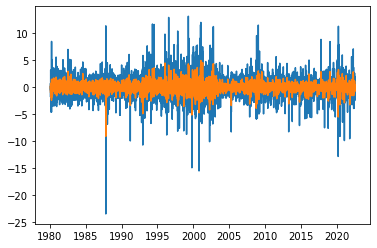

In [239]:
plt.plot(df['Close_pct'])
plt.plot(df['EWMA15_pct'])

In [240]:
df = df[1:]
df

,Open,High,Low,Close,Adj Close,Volume,Close_pct,EWMA15,EWMA15_pct
Date,,,,,,,,,
1980-02-04,16.581022,16.640774,16.401770,16.521273,4.932415,1205829,-0.360349,16.545173,-0.216210
1980-02-05,16.521273,16.640774,16.431644,16.640774,4.968094,1595778,0.723317,16.590457,0.273704
1980-02-06,16.491396,16.491396,16.192638,16.342016,4.939919,2133003,-1.795335,16.487259,-0.622036
1980-02-07,16.312141,16.312141,16.043261,16.043261,4.849609,2145555,-1.828144,16.316814,-1.033797
1980-02-08,16.043261,16.162764,15.834130,16.073135,4.858636,2631318,0.186214,16.227770,-0.545716
...,...,...,...,...,...,...,...,...,...
2022-07-06,138.000000,139.139999,137.130005,138.080002,133.120148,3237000,0.334259,139.261247,-0.422320
2022-07-07,138.910004,141.320007,138.830002,140.830002,135.771362,3897100,1.991599,139.784166,0.375494
2022-07-08,140.759995,141.320007,139.820007,140.470001,135.424301,2820800,-0.255628,140.012777,0.163546


<ipython-input-241-43856d7d8320>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_pct'] = np.where(abs(df['Close_pct']) > 5, 5,df['Close_pct'])
<ipython-input-241-43856d7d8320>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA15_pct'] = np.where(abs(df['EWMA15_pct']) > 5, 5,df['EWMA15_pct'])


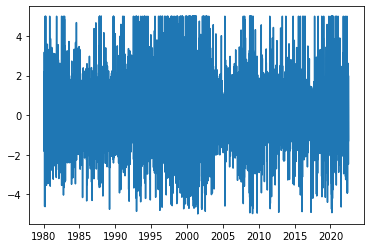

In [241]:
#Clip the close pct at 5

df['Close_pct'] = np.where(abs(df['Close_pct']) > 5, 5,df['Close_pct'])
df['EWMA15_pct'] = np.where(abs(df['EWMA15_pct']) > 5, 5,df['EWMA15_pct'])
plt.plot(df['Close_pct'])

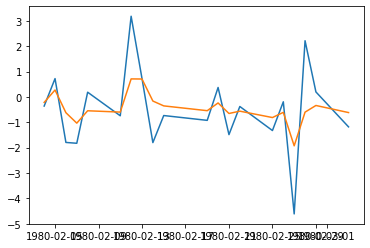

In [242]:
plt.plot(df['Close_pct'][:20])
plt.plot(df['EWMA15_pct'][:20])

##Create Dataset, Scale and create Training and Testing Split

In [243]:
x = list(df['EWMA15_pct'])

In [244]:
len(x)

10700

In [274]:
input_sequences = []
target_sequences1 = []

no_of_past_days = 100
no_of_future_days = 4
for i in range(no_of_past_days, len(x)-3):
  target_sequences1.append(x[i: i+no_of_future_days])
  input_sequences.append(x[i-no_of_past_days: i])


In [275]:
input_array = np.array(input_sequences, dtype=object).astype('float32') 
target_array = np.array(target_sequences1, dtype=object).astype('float32')

print(input_array.shape, target_array.shape)

(10597, 100) (10597, 4)


In [276]:
input_array = np.reshape(input_array, (input_array.shape[0],1,-1))

In [277]:
input_array.shape, target_array.shape

((10597, 1, 100), (10597, 4))

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( input_array, target_array, test_size=0.33, random_state=42)

In [279]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7099, 1, 100), (3498, 1, 100), (7099, 4), (3498, 4))

In [280]:
import keras
from keras import layers
import tensorflow as tf

tf.random.set_seed(0)

model = keras.Sequential()

model.add(layers.LSTM(128, return_sequences=True, recurrent_dropout=0.2,
                                           kernel_initializer=tf.keras.initializers.random_normal(seed=1)))
model.add(layers.LSTM(128, return_sequences=True, recurrent_dropout=0.2,
                                           kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.add(layers.Dense(no_of_future_days, activation='sigmoid', 
                       kernel_initializer=tf.keras.initializers.random_normal(seed=1)))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])


In [281]:
history = model.fit(X_train, y_train, epochs=50, 
                    batch_size=16,  validation_split=0.2)

Epoch 1/50
355/355 [==============================] - 10s 12ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.5644 - val_mse: 0.5648
Epoch 2/50
355/355 [==============================] - 3s 9ms/step - loss: 0.5328 - mse: 0.5328 - val_loss: 0.5638 - val_mse: 0.5641
Epoch 3/50
355/355 [==============================] - 4s 13ms/step - loss: 0.5329 - mse: 0.5330 - val_loss: 0.5641 - val_mse: 0.5645
Epoch 4/50
355/355 [==============================] - 3s 9ms/step - loss: 0.5330 - mse: 0.5330 - val_loss: 0.5639 - val_mse: 0.5643
Epoch 5/50
355/355 [==============================] - 3s 9ms/step - loss: 0.5328 - mse: 0.5328 - val_loss: 0.5640 - val_mse: 0.5643
Epoch 6/50
355/355 [==============================] - 3s 9ms/step - loss: 0.5328 - mse: 0.5328 - val_loss: 0.5648 - val_mse: 0.5652
Epoch 7/50
355/355 [==============================] - 4s 13ms/step - loss: 0.5328 - mse: 0.5327 - val_loss: 0.5639 - val_mse: 0.5642
Epoch 8/50
355/355 [==============================] - 3s 9ms/step - loss

In [287]:
y_test.shape

(3498, 4)

In [288]:
predictions = model.predict(X_test)

110/110 [==============================] - 0s 2ms/step


In [289]:
predictions = np.reshape(predictions, (y_test.shape[0],no_of_future_days))

In [290]:
X_test_re = np.reshape(X_test, (X_test.shape[0],no_of_past_days))

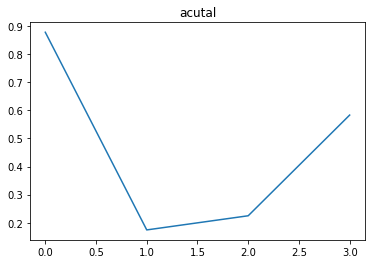

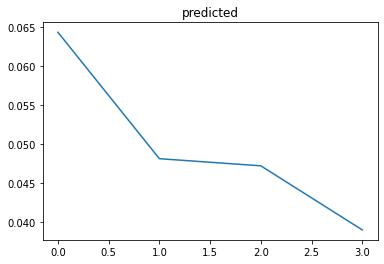

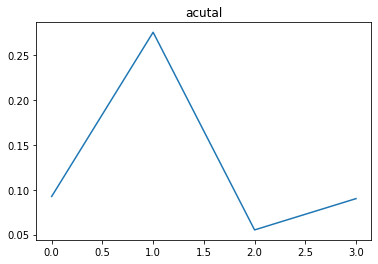

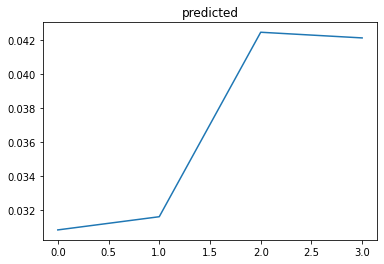

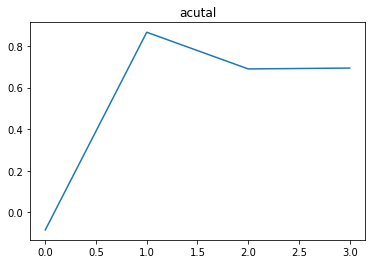

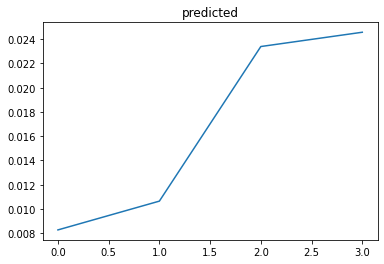

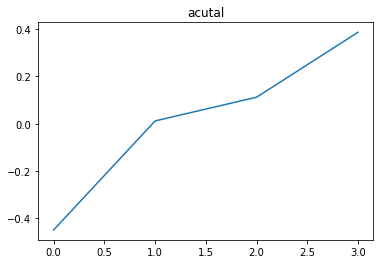

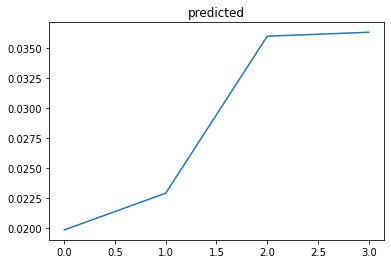

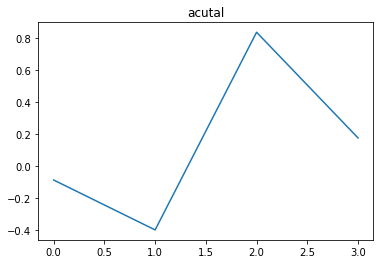

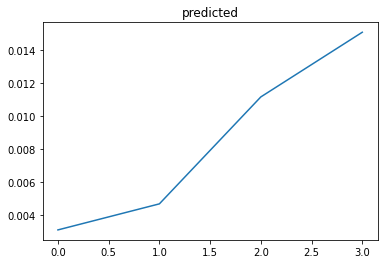

In [291]:
for i in range(0,5):
  plt.figure()
  plt.title("acutal")
  final_plot1 = list(y_test[i])
  plt.plot(final_plot1)
  
  plt.figure()
  plt.title("predicted")
  final_plot = list(predictions[i])
  plt.plot(final_plot)
